# **Data Study**

## Objectives

* Download data from Kaggle.com and perform an initial EDA.

## Inputs

* unclean_smartwatch_health_data.csv

## Outputs

* ydata-profiling EDA

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

In [ ]:
CleanedDataFolder = "inputs/cleaned_data/"
OutputFolder = "outputs/"
HypothesisOneFolder = CleanedDataFolder + "hypothesis_one_data/"

In [ ]:
import pandas as pd

%matplotlib inline
# Hypothesis 1
data = pd.read_csv(HypothesisOneFolder + "cleaned_smartwatch_health_data.csv")
df1 = pd.DataFrame(data)
df1.head()

# Section 1 Assess Correlation and PPS score

First i tried a pearsons correlation test, I encoded the categoric variable for this task. I feel OneHotEncoder provides more insights that OrdinalEncoder for this dataset.

In [ ]:
import numpy as np
from feature_engine.encoding import OrdinalEncoder, OneHotEncoder

encoder = OneHotEncoder(variables=["Activity Level"])
# I have chosen OrdinalEncoder as our categorical variables have an ordinal relationship
        

df_onehot = encoder.fit_transform(df1)
df_onehot.head()

In [ ]:
import ppscore as pps
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = df_onehot.corr(method='pearson')

# or you can use spearman method
# df = df.corr(method='spearman')

def heatmap_corr(data, threshold, figsize=(12, 12), annot_size=6):
    # we create the mask for the upper diagonal and
    # show only values greater than the threshold
    mask = np.zeros_like(data, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    mask[abs(data) < threshold] = True

    # we plot the heatmap as usual
    fig, axes = plt.subplots(figsize=(5, 5))
    sns.heatmap(data=data, annot=True, xticklabels=True, yticklabels=True,
                mask=mask, cmap='viridis', annot_kws={"size": annot_size}, ax=axes,
                linewidth=0.5
                )
    plt.ylim(len(data.columns), 0)
    plt.show()


heatmap_corr(data=df, threshold=0.0)

Correlation exists where you expect to find it with the given variables, but the correlation is far too little to say for sure the columns have a direct downward or upward relationship with eachother.

The only way i was able to visualize this data clearly , was with density plots (kdeplots) as the different columns are very noisey. This may take three or four minutes to load this plot montage. Check in the outputs folder in this workspace and enter the subfolder density_plots to view the below functions vizualizations on their own, during the functions execution 

In [ ]:
df = df_onehot.copy()
 
 # Create output directory if it doesn't exist
output_dir = OutputFolder + 'density_plots'
os.makedirs(output_dir, exist_ok=True)
 
# List of columns to compare
columns = ['Heart Rate (BPM)', 'Blood Oxygen Level (%)', 'Step Count', 'Sleep Duration (hours)', 'Stress Level', 'Activity Level_Highly Active', 'Activity Level_Active', 'Activity Level_Sedentary']

# Create a figure with subplots for the lower triangle
fig, axes = plt.subplots(len(columns), len(columns), figsize=(20, 20))
fig.suptitle('Density Plots Montage', fontsize=20)

# Plot only the lower triangle of the matrix
for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i > j:  # This condition ensures only the lower triangle is plotted
            sns.kdeplot(
                x=df[col2], y=df[col1], 
                cmap='viridis', fill=True, 
                ax=axes[i, j]
            )
            plot_title = f'{col1} vs. {col2}'
            axes[i, j].set_xlabel(col2)  # Set correct x-label
            axes[i, j].set_ylabel(col1)  # Set correct y-label
            
            # Save each individual plot
            individual_plot_path = os.path.join(
                output_dir, f"{plot_title.replace(' ', '_').lower()}.png"
            )
            single_plot_fig = plt.figure()
            sns.kdeplot(x=df[col2], y=df[col1], cmap='viridis', fill=True)
            plt.title(plot_title)
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.savefig(individual_plot_path)
            plt.close(single_plot_fig)
        else:
            axes[i, j].axis('off')  # Turn off plots in the upper triangle and diagonal

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the entire montage as a single image
montage_path = os.path.join(output_dir, 'density_plots_montage.png')

Disregard the 5 plots in the bottom right edge

* Blood Oxygen Level (%) vs. Heart Rate (BPM):

  * There's a concentration of data points around a heart rate of 65-80 BPM and blood oxygen levels of 95-100%. This suggests that most individuals have a heart rate within this range when their blood oxygen levels are high.

* Step Count vs. Heart Rate (BPM):

  * Higher step counts are associated with a more tight range of heart rates, with a concentration around 60-90 BPM. This suggests that individuals with higher step counts tend to have a healthy heart rate of about 60-90 bpm, wheras people with a higher more unhealthy heart rate of around 160 bpm starts bottle necking at the 6000 steps mark. Showing few people with a high heart rate have a step count over 6000.

* Step Count vs. Blood Oxygen Level (%):

  * Higher step counts are associated with blood oxygen levels around 95-100%. This suggests that individuals with higher step counts tend to maintain high blood oxygen levels.

* Sleep Duration (hours) vs. Heart Rate (BPM):

  * There's a concentration of data points around 6-8 hours of sleep and a heart rate of 60-80 BPM. This suggests that individuals who sleep for 6-8 hours tend to have a moderate heart rate.

* Sleep Duration (hours) vs. Blood Oxygen Level (%):

  * Sleep duration is generally associated with blood oxygen levels around 95-100%. This suggests that individuals maintain high blood oxygen levels regardless of sleep duration.

* Sleep Duration (hours) vs. Step Count:

  * There's a concentration of data points around 6-8 hours of sleep. This shows that people with lower step counts tend to sleep longer than people with higher step counts. The people with lower step counts are the majority.

* Stress Level vs. Heart Rate (BPM):

  * There's a concentration of data points around a heart rate of 60-80 BPM and varying stress levels. This suggests that stress level is not strongly correlated with heart rate. But you could say most people during varying levels of stress experience heart rates of around 60-80 bpm.d

* Stress Level vs. Blood Oxygen Level (%):

  * Stress levels are associated with blood oxygen levels around 95-100%. This suggests that individuals maintain high blood oxygen levels during stress.

* Stress Level vs. Step Count:

  * There's a concentration of data points around varying stress levels and lower step counts. This suggests that people with a higher step count feel less stressed, with majority having a low step count and experiencing fluctuating levels of stress.

* Stress Level vs. Sleep Duration (hours):

  * There's a concentration of data points around 6-8 hours of sleep and varying stress levels. This suggests that people who are experiencing varying levels of stress only sleep for about 6-7 hours.

*  OneHotEncoder generated columns from the "Activity Levels" categoric variable that consisted of 3 classes after cleaning

* Activity_Level_Highly_Active vs. Heart Rate (BPM)

  * It would seem people who are not classed as Highly Active (0) experience higher heart rates, possibly due to being unhealthier that people who are Highly Active (1).

* Activity_Level_Highly_Active vs Blood Oxygen Level (%)

  * It would seem individuals who are classed as highly active dont experience blood oxygen levels less than 94.8. So people who are highly active tend to have a slightley higher blood oxygen levels overall.

* Activity_Level_Highly_Active vs. Step Count

  * It seems that individuals who are not classified as highly active tend to have a more common step count of below 5,000. As the step count increases, the density bottlenecks, indicating that fewer people are achieving higher step counts. The lack of highlights in the positive high activity density area suggests that there are either fewer people in this category, or that their step counts vary significantly more compared to individuals who are not highly active.

* Activity_Level_Highly_Active vs. Sleep Duration (hours)

  * This shows that people dont experience much change in sleep level when highly active or not, with a higher density for the lower plot being probably due to more people are classed as not highly active than people who are maybe in the normal or low ranges.

* Activity_Level_Highly_Active vs. Stress Level

  * The highest density regions in the lower cluster suggest that a significant number of individuals with lower activity levels experience varying stress levels. In contrast, the upper cluster shows that fewer highly active individuals have varying stress levels.

The density clusters (lighter areas) at the bottom of each plot gradually decrease as you go from Highly Active to Active to Sedentary. The higher density in the lower activity levels suggests that a larger proportion of people are classified as the lower brackets of activity levels, with individuals even being below sedentary. The lower density in the top density plot (1.0) in the Highly Active group shows that fewer individuals achieve high activity levels. The bottom plot (0.0) represents individuals who are not classified as Highly Active, Active, or Sedentary. Overall the higher density traveling downwards in these plot suggests that more people are in the lower activity groups (Sedentary and Active), and fewer people are in the Highly Active group. This indicates that more individuals fall into the lower activity brackets and higher activity levels should be promoted.

Calculate PPS

PPS showed no insightfull information I could use.

In [ ]:
pps_matrix_raw = pps.matrix(df_onehot)
pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

In [ ]:
# We use a modified version of our custom heatmap function to plot the PPS matrix.
def heatmap_pps(df,threshold, figsize=(8,8), font_annot = 10):
    if len(df.columns) > 1:

      mask = np.zeros_like(df, dtype=bool)
      mask[abs(df) < threshold] = True

      fig, ax = plt.subplots(figsize=figsize)
      ax = sns.heatmap(df, annot=True, annot_kws={"size": font_annot},
                       mask=mask,cmap='rocket_r', linewidth=0.05,
                       linecolor='lightgrey')
      
      plt.ylim(len(df.columns),0)
      plt.show()

heatmap_pps(df=pps_matrix, threshold=0)


Section 1 content

---

To visualise the data perhaps better, it would be better to use an arbitrary discretizer on all numeric variables, just too see if i can glean any insights whilst the data is in a categorical form with a parallel plot and countplots.

In [ ]:
from feature_engine.discretisation import ArbitraryDiscretiser

df = df1.copy()

# Define custom bins for 'Step Count'
bin_edges = [0, 3524, 7048, 10572, 14096, 17620, float('inf')]
bin_labels = ['<3524', '3525-7048', '7049-10572', '10573-14096', '14097-17620', '20000+']

# Define custom bins for 'Stress Level'
bin_edges2 = [0, 3, 5, 7, 9, 11]
bin_labels2 = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

# Define Custom bins for 'Sleep Duration (hours)'
# sleep duration is between 2 and 10 hours
bin_edges3 = [2, 4, 6, 8, 11]
bin_labels3 = ['2-4', '4-6', '6-8', '8-11']

# Define custom bins for Heart Rate (BPM)
# heart rate is between 40 and 114
bin_edges4 = [39, 60, 80, 100, 114]
bin_labels4 = ['39-60', '60-80', '80-100', '100-114']

# Define custom bins for Blood Oxygen Level (%)
# blood oxygen level is between 92 and 100
bin_edges5 = [92, 94, 96, 98, 100]
bin_labels5 = ['92-94', '94-96', '96-98', '98-100']


# Initialize the ArbitraryDiscretiser with custom bins
discretizer = ArbitraryDiscretiser(
    binning_dict={'Step Count': bin_edges, 'Stress Level': bin_edges2,
                  'Sleep Duration (hours)': bin_edges3,
                  'Heart Rate (BPM)': bin_edges4,
                  'Blood Oxygen Level (%)': bin_edges5}, return_object=True)

# Fit and transform the data
df_discretized = discretizer.fit_transform(df)

# Map the bin labels to the discretized 'Step Count'
df_discretized['Step Count'] = pd.cut(df['Step Count'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Map the bin labels to the discretized 'Stress Level'
df_discretized['Stress Level'] = pd.cut(df['Stress Level'], bins=bin_edges2, labels=bin_labels2, include_lowest=True)

# Map the bin labels to the discretized 'Sleep Duration (hours)'
df_discretized['Sleep Duration (hours)'] = pd.cut(df['Sleep Duration (hours)'], bins=bin_edges3, labels=bin_labels3, include_lowest=True)

# Map the bin labels to the discretized 'Heart Rate (BPM)'
df_discretized['Heart Rate (BPM)'] = pd.cut(df['Heart Rate (BPM)'], bins=bin_edges4, labels=bin_labels4, include_lowest=True)

# Map the bin labels to the discretized 'Blood Oxygen Level (%)'
df_discretized['Blood Oxygen Level (%)'] = pd.cut(df['Blood Oxygen Level (%)'], bins=bin_edges5, labels=bin_labels5, include_lowest=True)




I can use the below parallel plot to explain the data better to non-techniqual individuals

In [1]:
import plotly.express as px
# Feel free to include Blood Oxygen Level (%) and Heart Rate (BPM) in the parallel categories plot.
to_include_parrallel = ['Step Count', 'Sleep Duration (hours)', 'Stress Level', 'Activity Level']

fig = px.parallel_categories(df_discretized, dimensions=to_include_parrallel)
fig.show(renderer='jupyterlab')


NameError: name 'df_discretized' is not defined

## Overall Summary

**Summary**

* Individuals with higher blood oxygen levels (95-100%) tend to have heart rates around 65-80 BPM.

* Higher step counts (above 6,000 steps) are linked with healthier heart rates (60-90 BPM) and higher blood oxygen levels (95-100%).

* People who sleep for 6-8 hours tend to have heart rates of 60-80 BPM and maintain high blood oxygen levels regardless of sleep duration.

* Lower step counts are associated with longer sleep durations (6-8 hours) and higher stress levels.

* Stress levels don't strongly correlate with heart rate or blood oxygen levels, but people with varying stress levels tend to have heart rates of 60-80 BPM and sleep for 6-7 hours.

* Individuals classified as Highly Active generally have healthier heart rates, higher blood oxygen levels (above 94.8%), and higher step counts compared to those who are not Highly Active.

* Lower activity levels (Sedentary and Active) are more common among individuals, with fewer people achieving high activity levels (Highly Active).

I will save the discretized dataset incase for whatever reason we need to change our ML task into a classification problem.

In [ ]:
discret_folder = os.path.join(CleanedDataFolder, "discretized_dataset/")
os.makedirs(discret_folder, exist_ok=True)
df_discretized.to_csv(discret_folder + "discretized_smartwatch_health_data.csv", index=False)


## Extra analysis / Visuals

This analysis was performed for hypothesis 2 and 3 to get an insight to see if it is worth training an ML model to predict Stress Level and Step Count when inputed with various other watch health data. It would seem you can draw little seperation between the data points, and imagining a line or flat plane through the data to seperate it, seems not possible. this was done with PCA to measure the significant components against eachother, allthough out of 5 components, all seem to have a very similar siginificance.

In [ ]:
from sklearn.preprocessing import StandardScaler

encode_activity = OrdinalEncoder(encoding_method='arbitrary', variables=["Activity Level"])
df_encode = encode_activity.fit_transform(df1)
df_target1 = df_encode["Stress Level"]
df_target2 = df_encode["Step Count"]
df_feat1 = df_encode.drop("Stress Level", axis=1)
df_feat2 = df_encode.drop("Step Count", axis=1)

df_feat1t = StandardScaler().fit_transform(df_feat1)
df_feat2t = StandardScaler().fit_transform(df_feat2)

In [ ]:
from sklearn.decomposition import PCA

n_components = 5 # set the number of components as all columns in the data (zero indexed)

pca1 = PCA(n_components=n_components).fit(df_feat1t)
pca2 = PCA(n_components=n_components).fit(df_feat2t) # set PCA object and fit to the data
x_PCA1 = pca1.transform(df_feat1t) # array with transformed PCA
x_PCA2 = pca2.transform(df_feat2t)


# the PCA object has .explained_variance_ratio_ attribute, which tells 
# how much information (variance) each component has 
# We store that to a DataFrame relating each component to its variance explanation
ComponentsList = ["Component " + str(number) for number in range(n_components)]
dfExplVarRatio = pd.DataFrame(
    data= np.round(100 * pca1.explained_variance_ratio_ ,2),
    index=ComponentsList,
    columns=['Explained Variance Ratio (%)'])

# prints how much of the dataset these components explain (naturally in this case will be 100%)
PercentageOfDataExplained = dfExplVarRatio['Explained Variance Ratio (%)'].sum()

print(f"* The {n_components} components explain {round(PercentageOfDataExplained,2)}% of the data \n")
print(dfExplVarRatio)

In [ ]:
sns.scatterplot(x=x_PCA1[:,0], y=x_PCA1[:,1], hue=df_target1, alpha=0.8)
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(x=x_PCA1[:,0], y=x_PCA1[:,1], z= x_PCA1[:,4] , color=df_target1,
                    labels=dict(x="Component 0", y="Component 1", z='Component 2'),
                    color_continuous_scale='spectral',
                    width=750, height=500)
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
df_target1discret = pd.read_csv(CleanedDataFolder + "discretized_dataset/discretized_smartwatch_health_data.csv")["Stress Level"]

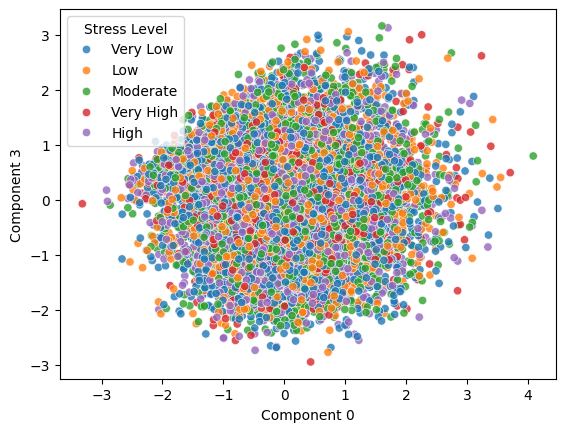

In [ ]:
sns.scatterplot(x=x_PCA1[:,0], y=x_PCA1[:,1], hue=df_target1discret, alpha=0.8)
plt.xlabel('Component 0')
plt.ylabel('Component 3')
plt.show()

In [ ]:
fig = px.scatter_3d(x=x_PCA1[:,0], y=x_PCA1[:,1], z= x_PCA1[:,2] , color=df_target1discret,
                    labels=dict(x="Component 0", y="Component 1", z='Component 2'),
                    color_continuous_scale='spectral',
                    width=750, height=500)
fig.update_traces(marker_size=5)
fig.show()

/home/cistudent/.local/lib/python3.12/site-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



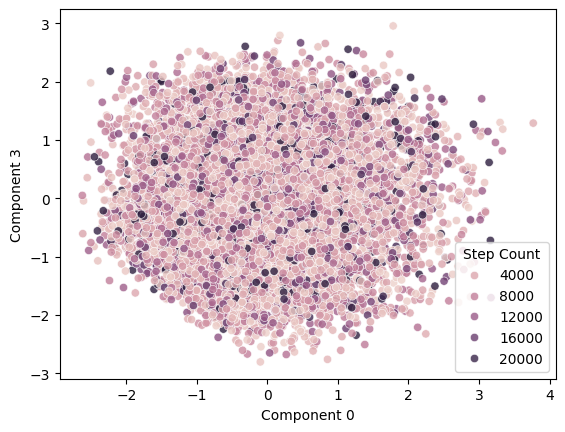

In [ ]:
sns.scatterplot(x=x_PCA2[:,0], y=x_PCA2[:,1], hue=df_target2, alpha=0.8)
plt.xlabel('Component 0')
plt.ylabel('Component 3')
plt.show()

In [ ]:
fig = px.scatter_3d(x=x_PCA2[:,0], y=x_PCA2[:,1], z= x_PCA2[:,2] , color=df_target2,
                    labels=dict(x="Component 0", y="Component 1", z='Component 2'),
                    color_continuous_scale='spectral',
                    width=750, height=500)
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
df_target2discret = pd.read_csv(CleanedDataFolder + "discretized_dataset/discretized_smartwatch_health_data.csv")["Step Count"]

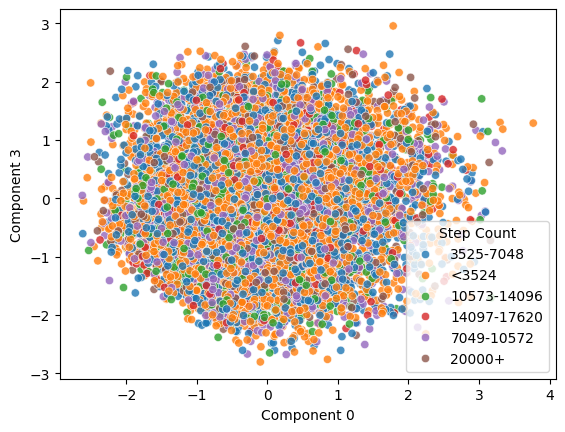

In [ ]:
sns.scatterplot(x=x_PCA2[:,0], y=x_PCA2[:,1], hue=df_target2discret, alpha=0.8)
plt.xlabel('Component 0')
plt.ylabel('Component 3')
plt.show()

In [ ]:
fig = px.scatter_3d(x=x_PCA2[:,0], y=x_PCA2[:,1], z= x_PCA2[:,2] , color=df_target2discret,
                    labels=dict(x="Component 0", y="Component 1", z='Component 2'),
                    color_continuous_scale='spectral',
                    width=750, height=500)
fig.update_traces(marker_size=5)
fig.show()

/home/cistudent/.local/lib/python3.12/site-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

df_eda = df_discretized.copy()

# Define a custom color palette
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#8D6F64', '#060270']

# Set the custom palette
sns.set_palette(custom_palette)

vars_to_study = ['Heart Rate (BPM)', 'Blood Oxygen Level (%)', 'Step Count', 'Sleep Duration (hours)', 'Stress Level', 'Activity Level']

def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var, palette=custom_palette, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="poly", palette=custom_palette)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()

Plotted the target variables for hypothesis 2 and 3

In [ ]:
target_var = 'Step Count'
for col in vars_to_study:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")

In [ ]:
study2 = vars_to_study.copy()
study2.remove("Stress Level")
target_var = 'Stress Level'
for col in study2:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
